<a href="https://colab.research.google.com/github/Juliansin/Data-Science-I/blob/main/ProyectoDS_ParteII_Antunez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campaña de marketing de banco

## Introducción al dataset elegido
El conjunto de datos utilizado se centra en **campañas de marketing directas de una institución bancaria portuguesa**. Estas estaban basadas en llamadas telefónicas, donde a menudo se requerían múltiples contactos con el mismo cliente para determinar si este último se suscribiría o no a un depósito a plazo fijo ofrecido por el banco.

Además de determinar la efectividad de las campañas, el conjunto de datos proporciona una amplia gama de características socioeconómicas y de comportamiento de los clientes que podrían influir en su decisión de suscribirse o no a un depósito a plazo fijo.

Las variables incluidas abarcan desde características demográficas como la edad y el estado civil, hasta información financiera como la situación crediticia y la participación en campañas de marketing anteriores. Adicionalmente presenta datos socioenónmicos como el índice de precios al consumidor del momento.

A partir de este conjunto de datos, trabajaremos sobre las siguientes hipótesis preliminares.



1.   La edad influye en la suscripción de depósitos a plazo fijo
1.   A mayor nivel educativo alcanzado es más probable invertir
1.   A mayor duración del contacto con el cliente mayor es la probabilidad de que suscriba depósitos a plazo fijo
2.   Tener créditos hipotecarios o personales impacta en la suscripción de depósitos a plazo fijo
2.   El contexto socioeconómico (tasa de empleo, índice de precios al consumidor, etc.) impacta en la suscripción a depósitos de plazo fijo


Fuente de la base de datos:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014. Recuperado en línea desde: https://www.kaggle.com/datasets/tunguz/bank-marketing-data-set

In [24]:
#Importo las librerías necesarias para el desarrollo del trabajo
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#sns.set_theme()
#sns.set_style()
mpl.style.use('seaborn-v0_8-pastel')

In [2]:
#Conecto a la carpeta de google drive
from google.colab import drive
import os
drive.mount('/content/gdrive/')
path = "/content/gdrive/MyDrive/DATA SCIENCE 1 - CODERHOUSE/"

Mounted at /content/gdrive/


In [113]:
#Importo el archivo CSV, aclarando que se delimitan los valores con ';'.
df = pd.read_csv(path+'bank-additional-full.csv',sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
#Reviso el dataset de forma preliminar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Aprovecho para aclarar a qué hacen referencia las 21 columnas del dataset:

1.   age: Edad
2.   job: Condición laboral
1.   marital: Estado civil
2.   education: Nivel educativo alcanzado
1.   default: ¿Tiene deudas impagas?
2.   housing: ¿Tiene créditos hipotecarios vigentes?
1.   loan: ¿Tiene créditos personales vigentes?
2.   contact: Tipo de contacto con el cliente
1.   month: Mes del último contacto
2.   day_of_week: Día del último contacto
1.   duration: Duración (en segundos) del último contacto
2.   campaign: Número de contactos por campaña
1.   pdays: Días transcurridos desde por campañas anteriores hasta el actual (999 significa no contactado)
2.   previous: Número de contactos anteriores a la campaña vigente
1.   poutcome: Resultado de la campaña de marketing anterior
2.   emp.var.rate: Tasa de variación del empleo (trimestral)
1.   cons.price.idx: Índice de precios al consumidor (mensual)
2.   cons.conf.idx: índice de confianza del consumidor (mensual)
1.   euribor3m: Tasa de interés promedio euribor (trimestral)
2.   nr.employed: Número de empleados registrados (trimestral)
1.   y: ¿El potencial cliente suscribió un plazo fijo? (resultado de la campaña)



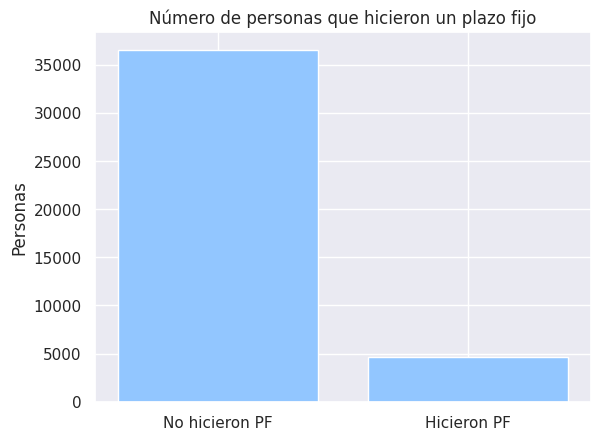

In [61]:
#Realizo un gráfico de barras
plazo_fijo = df['y'].value_counts()
plazo_fijo.index = ['No hicieron PF','Hicieron PF']
plt.bar(plazo_fijo.index, plazo_fijo.values)

plt.ylabel('Personas')
plt.title('Número de personas que hicieron un plazo fijo')

plt.show()

## Hipótesis 1 - La edad influye en la suscripción de depósitos a plazo fijo

Podemos observar que a pesar de que hay una tendencia hacia los 30 años entre los que si colocaron un plazo fijo, también la hay para los que fueron contactados pero no lo colocaron. La edad no determina la suscripción de depósitos a plazo fijo.

Text(0.5, 1.0, 'Distribución de edades según concresión de plazo fijo')

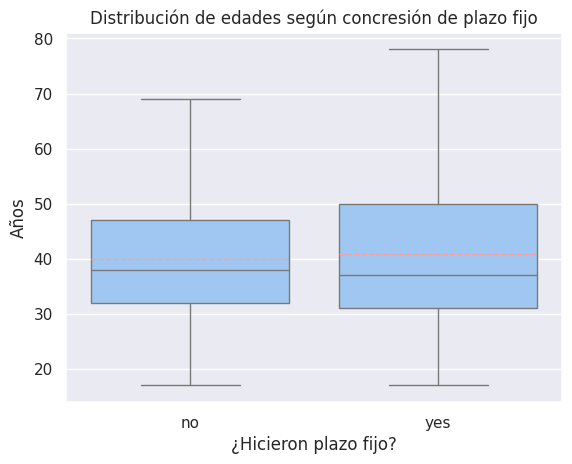

In [27]:
# Axis-level
ax = sns.boxplot(x="y", y="age", data=df, showfliers=False, showmeans = True, meanline = True)
plt.xlabel('¿Hicieron plazo fijo?')
plt.ylabel('Años')
plt.title('Distribución de edades según concresión de plazo fijo')

Si bien la media de ambos grupos (representada por la línea naranja) se ubica aproximadamente sobre los 40 años, la distribución de las personas que sí hicieron un plazo fijo esta sesgada hacia los valores más altos. Podemos apreciar que el tercer y cuarto cuartil abarcan un rango de edades mayores que los del grupo que no hicieron un plazo fijo.
Podemos observar esto con un histograma de las edades del grupo que sí realizó un plazo fijo.


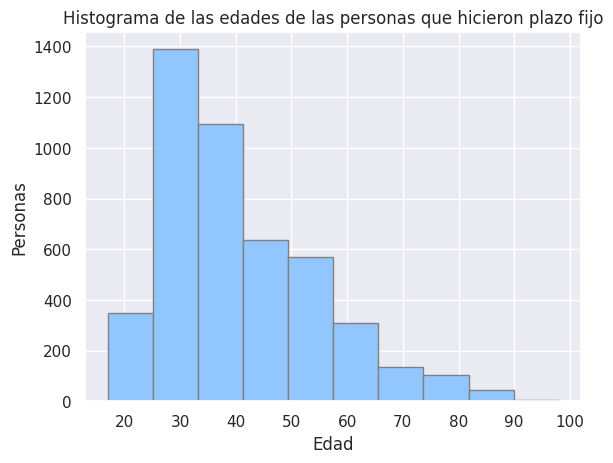

In [29]:
#Voy a continuar el análisis con los que sí hicieron un plazo fijo.
#Creo una dataframe que almacene sólo las filas cuyas personas si hicieron un plazo fijo.
plazo_fijo_si = df[df['y']=='yes']

#Creo un histograma con las edades de las personas que accedieron al PF
plt.hist(plazo_fijo_si['age'], edgecolor='gray')
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.title('Histograma de las edades de las personas que hicieron plazo fijo')

plt.show()


En base a este análisis, no encontramos evidencia que rechace la hipótesis planteada.

## Hipótesis 2 - A mayor nivel educativo alcanzado es más probable invertir

Podemos observar que la frecuencia de colocación de depósitos es mayor cuando más alto es el nivel educativo alcanzado (en este caso, universitario) y disminuye progresivamente hasta el nivel más bajo (sin educación, analfabetismo).

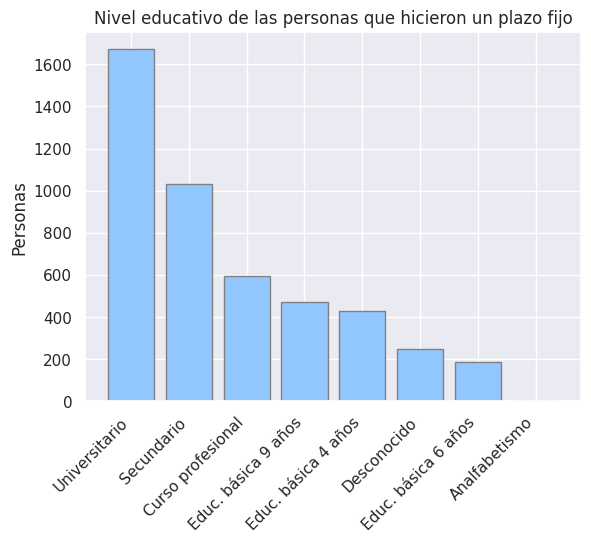

In [35]:
#Creo un diagrama de barras con el nivel educativo alcanzado de las personas que si hicieron un plazo fijo.
plazo_fijo_edu = plazo_fijo_si['education'].value_counts()
plazo_fijo_edu.index = ['Universitario', 'Secundario', 'Curso profesional', 'Educ. básica 9 años', 'Educ. básica 4 años','Desconocido','Educ. básica 6 años','Analfabetismo']
plt.bar(plazo_fijo_edu.index, plazo_fijo_edu.values, edgecolor="gray")
#Giro las etiquetas en el eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')
plt.ylabel('Personas')
plt.title('Nivel educativo de las personas que hicieron un plazo fijo')

plt.show()

A pesar de lo visto, vamos a observar la población estudiada, para estar seguros de que la muestra no está sesgada. Realizamos un histograma con todas las personas contactadas.

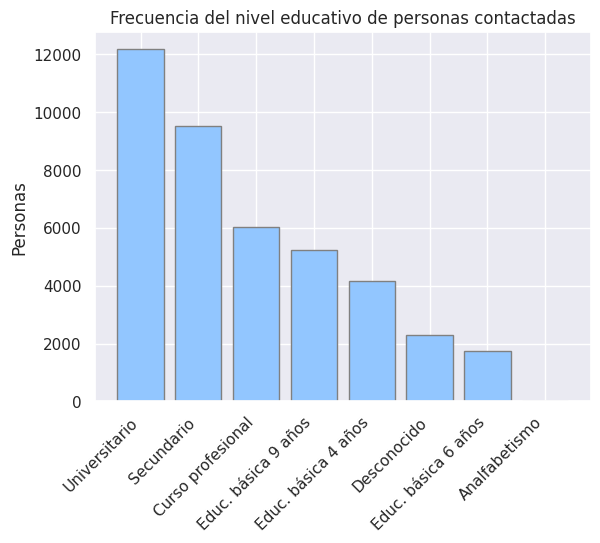

In [40]:
#Creo un diagrama de barras con el nivel educativo de todas las personas contactadas.
plazo_fijo_edu = df['education'].value_counts()
plazo_fijo_edu.index = ['Universitario', 'Secundario', 'Curso profesional', 'Educ. básica 9 años', 'Educ. básica 4 años','Desconocido','Educ. básica 6 años','Analfabetismo']
plt.bar(plazo_fijo_edu.index, plazo_fijo_edu.values, edgecolor="gray")
#Giro las etiquetas en el eje x para que no se superpongan
plt.xticks(rotation=45, ha='right')
plt.ylabel('Personas')
plt.title('Frecuencia del nivel educativo de personas contactadas')

plt.show()

Como puede verse, toda la población estudiada tiene el mismo ordenamiento.
Esto quiere decir que no necesariamente a mayor nivel de estudios alcanzados (por ejemplo, universitario) hay más probabilidad de que se invierta en plazos fijos, si no que la población con la que trabajamos tiene la particularidad de que se contactaron más frecuentemente a personas con mayor grado de estudio.

Con la evidencia obtenida rechazamos la hipótesis.

## Hipótesis 3 - A mayor duración del contacto con el cliente mayor es la probabilidad de que suscriba depósitos a plazo fijo

Podemos observar en el gráfico siguiente que, sin importar el medio de contacto utilizado, a mayor duración del contacto, menor es la cantidad de personas que terminó colocando un plazo fijo. Al contrario, cuanto menor es la duración, parece ser mayor la posibliidad.

Text(0.5, 1.0, 'Duración del contacto según concresión o no de plazo fijo')

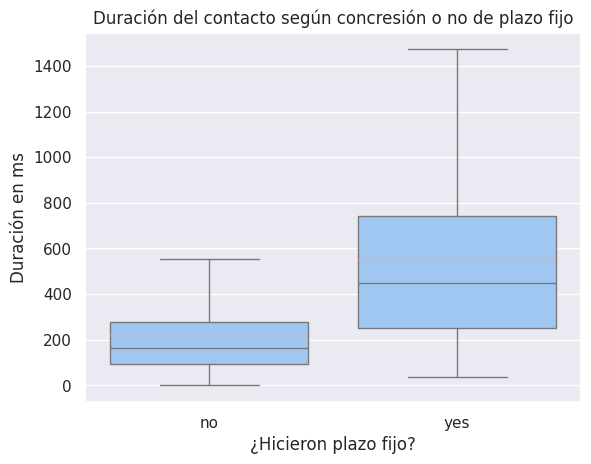

In [59]:
# Axis-level
ax = sns.boxplot(x="y", y="duration", data=df, showfliers=False, showmeans = True, meanline = True)
plt.xlabel('¿Hicieron plazo fijo?')
plt.ylabel('Duración en ms')
plt.title('Duración del contacto según concresión o no de plazo fijo')

Como puede observarse, la duración del contacto tiene una distribución distinta entre los que si hicieron un plazo fijo y los que no. Es más frecuente que mientras más tiempo se pase en contacto, más probable sea la concresión de una colocación de depósito.

No hay evidencia para rechazar la hipótesis.

## Hipótesis 4 - Tener créditos hipotecarios o personales vigentes impacta en la suscripción de depósitos a plazo fijo

Podemos observar en el gráfico siguiente que, la proporción de personas que realizaron un plazo fijo entre los que no tienen un crédito es muy similar a la de los que si lo tienen (tanto personal como hipotecario).

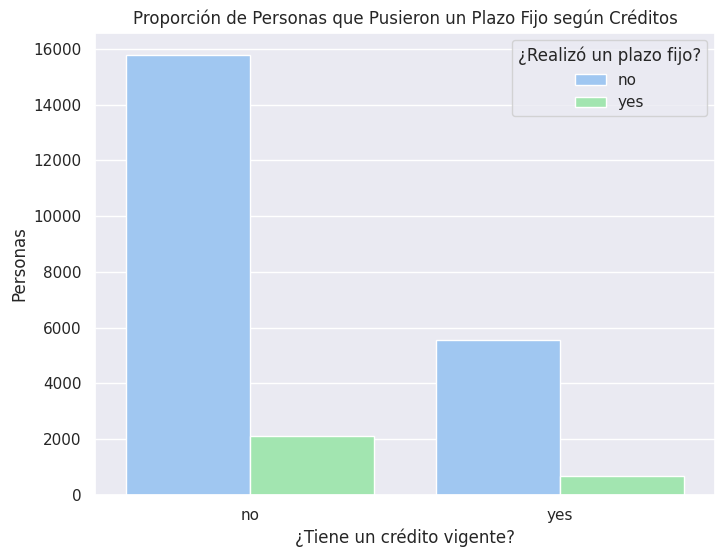

In [60]:
# Copio el dataframe origina filtrando los que tengan un crédito personal o hipotecario.
df_creditos = df[(df['loan'] == 'yes') | (df['housing'] == 'yes')]

# Sumo la cantidad de personas que sí pusieron un plazo fijo y las que no
contar = df_creditos.groupby(['loan', 'y']).size().reset_index(name='recuento')
plt.figure(figsize=(8, 6))
sns.barplot(data=contar, x='loan', y='recuento', hue='y')
plt.title('Proporción de Personas que Pusieron un Plazo Fijo según Créditos')
plt.xlabel('¿Tiene un crédito vigente?')
plt.ylabel('Personas')
plt.legend(title='¿Realizó un plazo fijo?')
plt.show()

#No supe como cambiar las etiquetas yes y no del eje x y de la referencia al plazo fijo.

De éste análisis inferimos que el comportamiento de los que tienen un crédito vigente de cualquier tipo es similar al de los que no lo tienen, por lo que no termina siendo una variable determinante a la hora de decidir colocar un plazo fijo.

Tenemos evidencia para decir que la hipótesis es falsa.

# Análisis del contexto macroeconómico en relación a la colocación de plazos fijos
A continuación vamos estudiar la relación que tienen los datos macroeconómicos con la colocación de plazos fijos.
Para este análisis vamos a tener en cuenta las variables que no habíamos análizado antes:


*   emp.var.rat
*   cons.price.idx
*   euribor3m
*   nr.employed
*   cons.price.idx

Vamos a comenzar reduciendo la dimensionalidad del modelo, utilizando el Análisis de Componentes Principales (PCA).
Luego, generaremos los clusters que identifiquemos cómo óptimos, y evaluaremos cada uno para identificar cuáles son las combinaciones de variables que se den con más frecuencia en el contexto de las personas que terminan por colocar un plazo fijo.

In [242]:
#Importo las librerías necesarias para el análisis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [259]:
# Creo un dataframe con las variables a utilizar y el resultado del contacto
df_macro = df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

# Visualizo los valores del dataframe filtrado
df_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emp.var.rate    41188 non-null  float64
 1   cons.price.idx  41188 non-null  float64
 2   cons.conf.idx   41188 non-null  float64
 3   euribor3m       41188 non-null  float64
 4   nr.employed     41188 non-null  float64
 5   y               41188 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.9+ MB


In [244]:
#Quito del análisis el resultado del contacto, variable "y"
df_num = df_macro.drop('y', axis=1)

In [245]:
ss = StandardScaler()
df_standarized = ss.fit_transform(df_num)
df_standarized

array([[ 0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991],
       [ 0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991],
       [ 0.64809227,  0.72272247,  0.88644656,  0.71245988,  0.33167991],
       ...,
       [-0.75234254,  2.05816805, -2.22495344, -1.49518647, -2.8156966 ],
       [-0.75234254,  2.05816805, -2.22495344, -1.49518647, -2.8156966 ],
       [-0.75234254,  2.05816805, -2.22495344, -1.49518647, -2.8156966 ]])

In [193]:
#Realizo el PCA a df_standarized
pca3 = PCA(n_components=3, random_state=42)
pca_3 = pca3.fit_transform(df_standarized)
pca_3

array([[-1.3063119 ,  0.69670709,  0.38582801],
       [-1.3063119 ,  0.69670709,  0.38582801],
       [-1.3063119 ,  0.69670709,  0.38582801],
       ...,
       [ 2.00298407, -2.32224743,  3.19478512],
       [ 2.00298407, -2.32224743,  3.19478512],
       [ 2.00298407, -2.32224743,  3.19478512]])

In [246]:
df_3 = pd.DataFrame({'PCA1': pca_3[:,0], 'PCA2': pca_3[:,1], 'PCA3': pca_3[:,2], 'PF':df_macro['y']})

In [248]:
#A continuación verifico el resultado de la estandarización del dataframe
df_3

,PCA1,PCA2,PCA3,PF
0,-1.306312,0.696707,0.385828,no
1,-1.306312,0.696707,0.385828,no
2,-1.306312,0.696707,0.385828,no
3,-1.306312,0.696707,0.385828,no
4,-1.306312,0.696707,0.385828,no
...,...,...,...,...
41183,2.002984,-2.322247,3.194785,yes
41184,2.002984,-2.322247,3.194785,no
41185,2.002984,-2.322247,3.194785,no
41186,2.002984,-2.322247,3.194785,yes


In [249]:
# Veamos cuanta varianza explica cada componente
print(pca3.explained_variance_ratio_)
#También vemos la explicaicón de la  varianza acumulada de los tres componentes
pca3.explained_variance_ratio_.sum()

[0.69421113 0.19655831 0.1020554 ]


0.9928248381588913

Text(0, 0.5, 'Varianza total explicada')

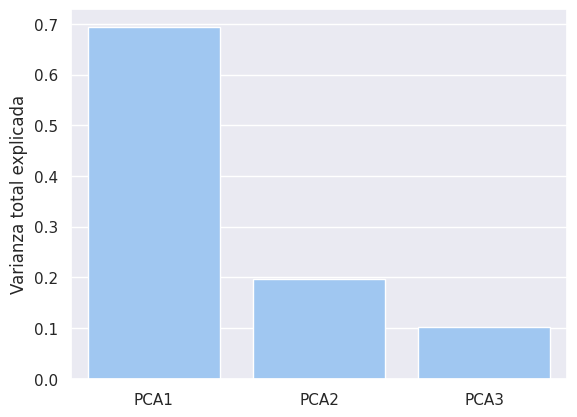

In [212]:
#Graficamos la varianza que explica cada componente
sns.barplot(x=['PCA1','PCA2','PCA3'], y=pca3.explained_variance_ratio_)
plt.ylabel("Varianza total explicada")

Una vez que reducimos la dimensionalidad de los datos que estamos analizando, vamos a análizar su distribución en un espacio propicio para los 3 componentes, es decir de 3 dimensiones.

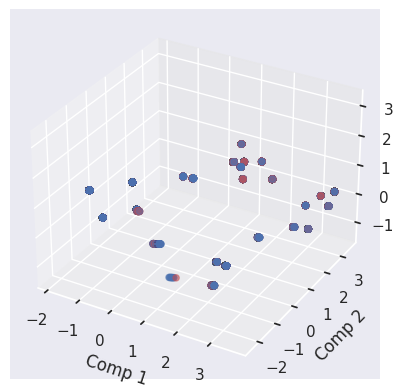

In [250]:
#Creamos un gráfico de 3 dimensiones para análizar los resultados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df_3['PCA1']
y = df_3['PCA2']
z = df_3['PCA3']

col = df_3['PF'].map({'yes':'r', 'no':'b'})

ax.scatter(x,y,z, c=col, marker='o')

ax.set_xlabel('Comp 1')
ax.set_ylabel('Comp 2')
ax.set_zlabel('Comp 3')

plt.show()

A partir de este punto, vamos a generar los clusteres de agrupación de datos. Como no sabemos a priori la cantidad óptima de clusters, vamos a recurrir al método del codo para tener alguna referencia.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

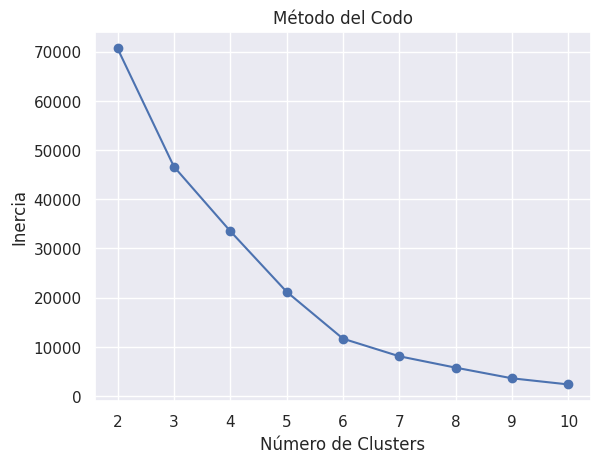

In [251]:
#Vamos a identificar con el método del codo la cantidad óptima de clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Inicializo una lista para almacenar los valores de la inercia y el coeficiente de silueta
inertia = []
silhouette_scores = []

# Defino un rango de posibles números de clusters
k_range = range(2, 11)

# Pruebo diferentes números de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_3[['PCA1', 'PCA2', 'PCA3']])
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_3[['PCA1', 'PCA2', 'PCA3']], kmeans.labels_))

# Grafico la curva del codo
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

En el bloque anterior, generamos los clusters para valores de 2 a 11  y en el gráfico observamos que la disminución en la suma de las distancias se atenúa cuando el número de clusters es igual a 6, por lo que, para este caso, vamos a continuar nuestro análisis con esa cantidad.
A continuación generamos los clusters en el mismo espacio tridimensional.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides de los clusters:
[[-1.30140006  0.76796094 -0.0371327 ]
 [ 2.45826295 -0.887904   -0.2747646 ]
 [-1.62175344 -0.65789687  0.15240128]
 [ 3.36051163  2.7046025  -0.18554777]
 [ 2.25450824  0.1673779   2.31562212]
 [ 0.03324491 -0.21226537 -0.83293225]]


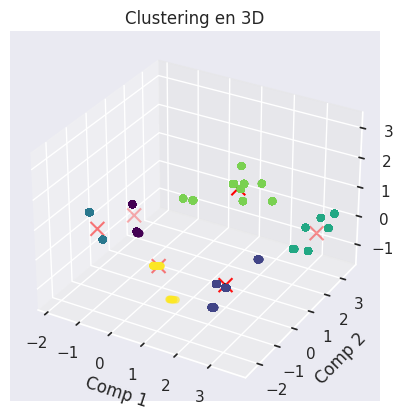

In [252]:
#En base al análisis realizado, determino  que la cantidad óptima para el análisis será de 6 clusters
from sklearn.cluster import KMeans

# Inicializo el modelo con el número de clusters determinado
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Ajusto el modelo a los datos de PCA
kmeans.fit(df_3[['PCA1', 'PCA2', 'PCA3']])

# Obtengo las etiquetas de cluster asignadas a cada punto de datos
labels = kmeans.labels_

# Añado las etiquetas de cluster al dataframe original
df_3['Cluster'] = labels

# Visualizar los centroides de los clusters en el espacio tridimensional
centroids = kmeans.cluster_centers_

# Grafico los centroides de los clusters
print("Centroides de los clusters:")
print(centroids)

# Grafico los clusters en el espacio tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df_3['PCA1']
y = df_3['PCA2']
z = df_3['PCA3']
col = df_3['Cluster']

ax.scatter(x, y, z, c=col, cmap='viridis', marker='o')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=100)
ax.set_xlabel('Comp 1')
ax.set_ylabel('Comp 2')
ax.set_zlabel('Comp 3')
plt.title('Clustering en 3D')
plt.show()

Una vez realizados estos agrupamientos, vamos a asignar la etiqueta resultante por cluster a cada caso de los datos estudiados.

In [253]:
#Ahora agrego la etiqueta de clusters al dataframe que contiene el análisis de cada variable antes de reducirlo.
df['Cluster'] = labels
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,4
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,4
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,4
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,4


Para continuar nuestro análisis, vamos a identificar la cantidad de plazos fijos colocados (en porcentaje) para cada cluster determinado.

In [254]:
# Cuento el número total de observaciones en cada cluster
total_por_cluster = df.groupby('Cluster').size()

# Cuento el número de plazos fijos realizados en cada cluster
plazos_fijos_por_cluster = df[df['y'] == 'yes'].groupby('Cluster').size()

# Calculo el porcentaje de plazos fijos realizados en cada cluster
porcentaje_plazos_fijos_por_cluster = (plazos_fijos_por_cluster / total_por_cluster) * 100

# Veamos el resumen
print("Porcentaje de plazos fijos realizados en cada cluster:")
print(porcentaje_plazos_fijos_por_cluster)


Porcentaje de plazos fijos realizados en cada cluster:
Cluster
0     4.252211
1    14.661044
2     5.380233
3    39.799178
4    52.137998
5     5.267512
dtype: float64


Graficamos los datos obtenidos para agilizar la interpretación.

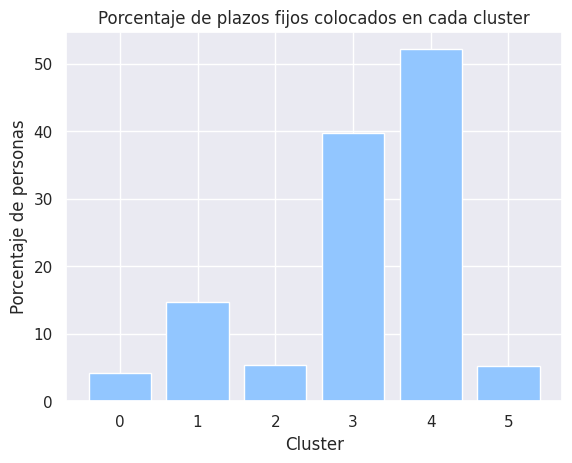

In [258]:
#Vamos a graficar los datos obtenidos
import matplotlib.pyplot as plt

# Creo el gráfico de barras
plt.bar(porcentaje_plazos_fijos_por_cluster.index, porcentaje_plazos_fijos_por_cluster.values)

plt.xlabel('Cluster')
plt.ylabel('Porcentaje de personas')
plt.title('Porcentaje de plazos fijos colocados en cada cluster')

plt.show()


A partir de este punto, podríamos estudiar las características macroeconómicas de cada cluster, observando con especial atención los clusters 4 y 5 (etiquetados como 3 y 4), ya que son las situaciones donde más plazos fijos se colocaron en términos relativos.

## Creamos un árbol de decisión ##
Ahora vamos a intentar generar un árbol de decisión que intente predecir la colocación o no de plazos fijos. Una vez identificados los clusteres, tenemos más datos para robustecer el modelo.
Como paso previo tenemos que corrregir un defecto del dataset.

Sucede que en el dataset, para identificar si había

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'Cluster']]  # Incluye las características que consideres relevantes
y = df['y']

# Codifico variables categóricas  utilizando OneHotEncoder
X = pd.get_dummies(X, drop_first=True)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8861374119932023

Reporte de Clasificación:
              precision    recall  f1-score   support

          no       0.94      0.93      0.94      7303
         yes       0.50      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.72      0.72      0.72      8238
weighted avg       0.89      0.89      0.89      8238


Matriz de Confusión:
[[6821  482]
 [ 456  479]]


## Resultados y Conclusiones: ##
Los resultados obtenidos del modelo clasificador de árbol de decisión fueron:

Accuracy: La precisión global es de 88,61%

Precision: la precisión fue de 0,94 para la etiqueta "no" y 0,50 para la categoría "si".

Rrecision: el recall fue de 0,93 para la etiqueta "no" y 0,51 para la categoría "si".

F1-Score: El f1 dio 0,94 para la etiqueta "no" y 0,51 para la categoría "si".

El dataset está desbalanceado, con muchas más instancias de la clase "no" (7303) que de la clase "yes" (935). Esto puede explicar por qué la precisión y el recall para la clase "yes" son significativamente más bajos.

Precisión y Recall Bajas para la Clase "yes": La precisión y el recall para la clase "yes" son bajos, lo que indica que el modelo no está prediciendo bien cuándo se hará un depósito a plazo fijo.


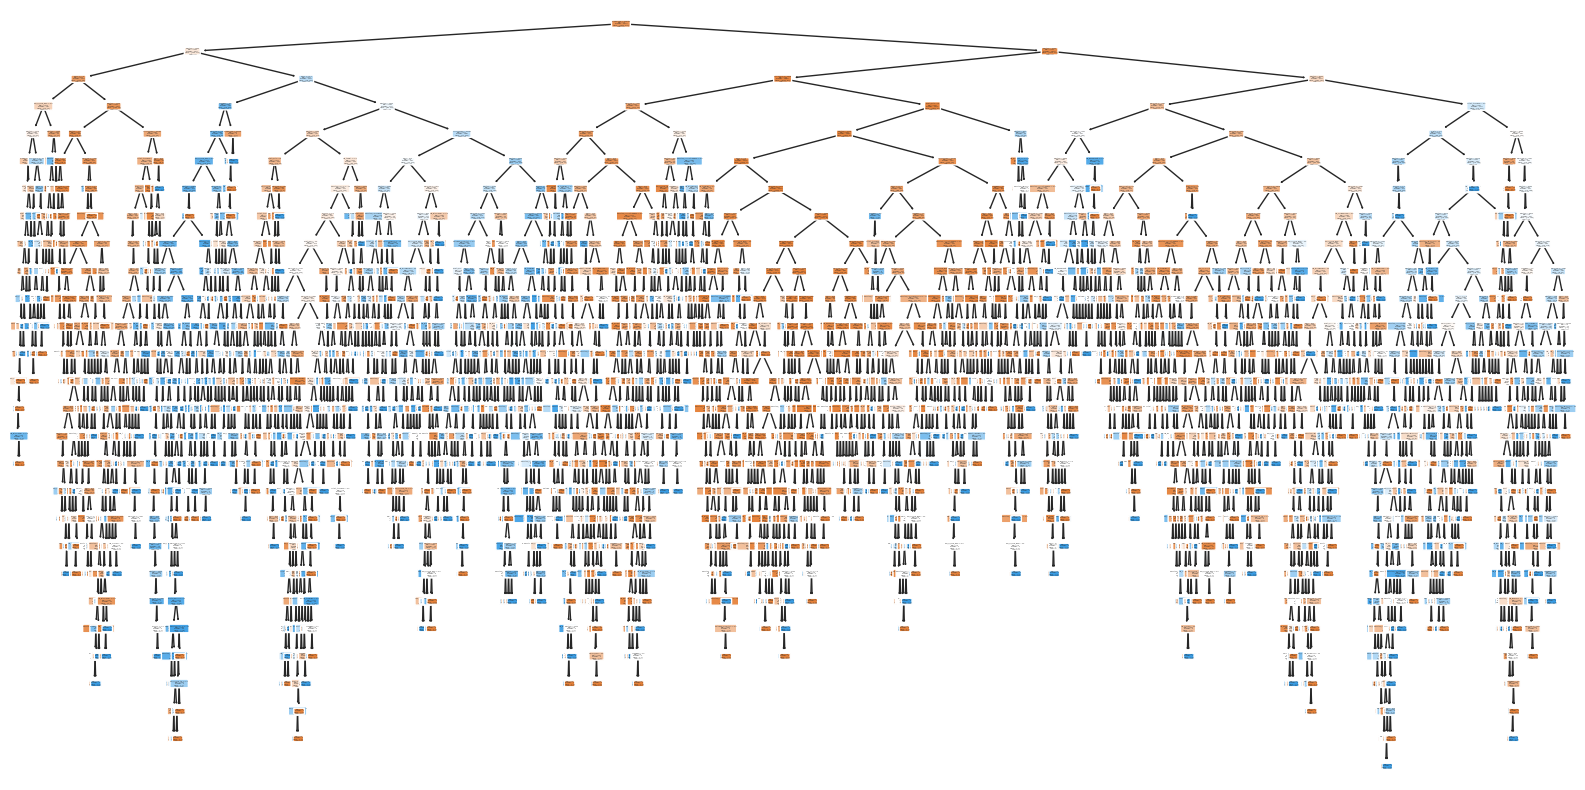

In [264]:
#Intento graficar el árbol de decisión, pero termina siendo poco interpretativo
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=clf.classes_, rounded=True)
plt.show()